<a href="https://colab.research.google.com/github/DAPLearning2025/DAPLearning2025/blob/main/Week15_LogisticReg_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Core Concept of Supervised Machine Learning - Logistic Regression
1. Explor and visualize the dataset
2. Preprocess data to fit ML models
3. Build and Traing a logistic regression classifier
4. Calcualte accuracy, prevision, and recall
5. Defin helper functions to build classification models using different algorithms



#Cross Entropy: Loss Function

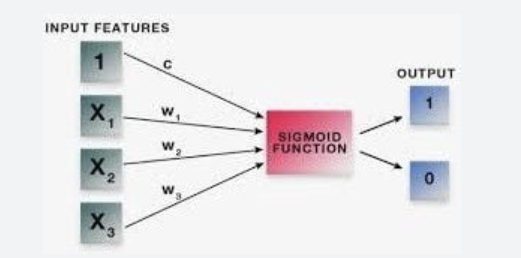

*In case our Linear regression* Our cost function was the mean square error (mse). We use mse to measure how far the line is from the actual points.

*In our Logistic Regression Model*. Cost Function is called the Cross Entropy. We use Cross Entropy to measure how well the estimated probabilities match actual labels.


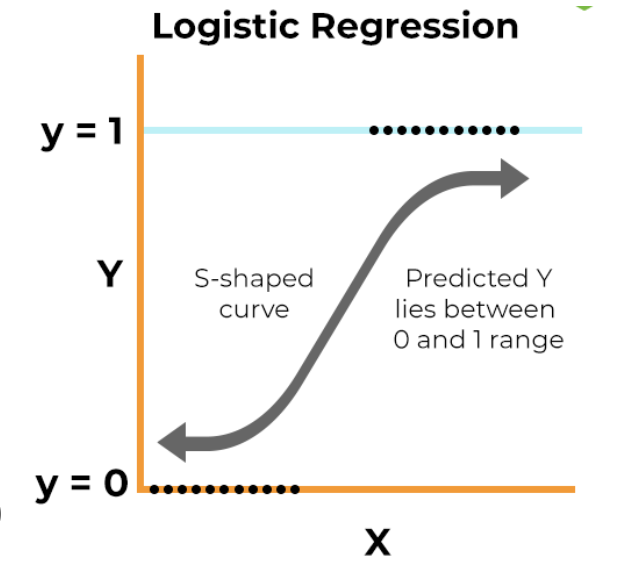

For more details: (https://www.geeksforgeeks.org/ml-cost-function-in-logistic-regression/)

**When you're building your model, your ultimate goal should minimizing the cost function. Let's take a look at this graph:

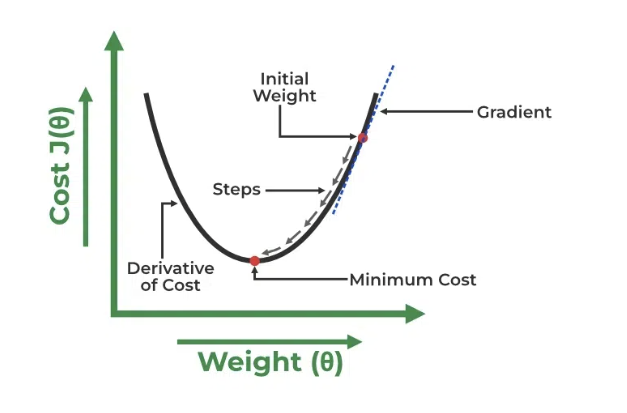

# An intuition look on Cross Entropy

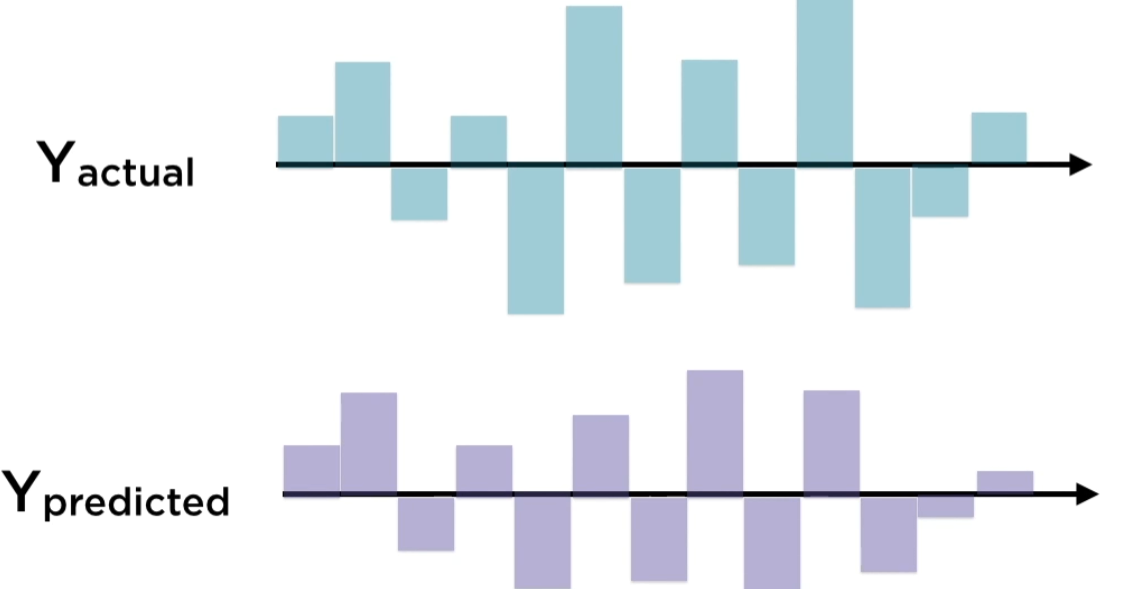

Let's synchronize the graphs

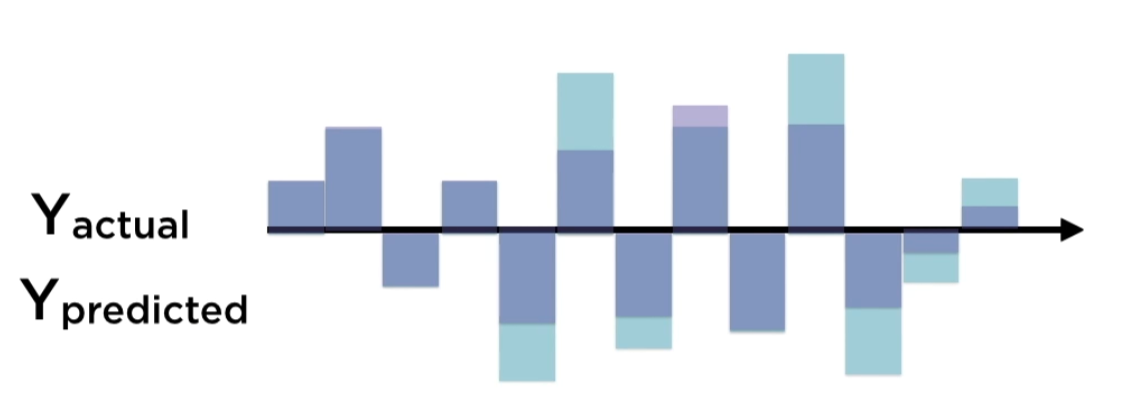

*   Low Cross Entropy: The label of actual and predicted series are in-synch
*   High Cross Entropy: The label of the two series are out-of-synch



#Acurracy, Precicion, and Recall

# Accuracy
1.   Compare predicted and actual labels
2.   More macthes = higher accuracy
3.   Note: An algorithm might have high accuracy but still be a poor machine learning model. Its predictions are useless. Ex: A model of All - is - well.

*Think to consider*

1.   Label distributions
2.   Skewed dataset

In some cases: Accuracyis a poor evaluation metric. We need **confusion matrix** to fix that.





#Binary Classification**
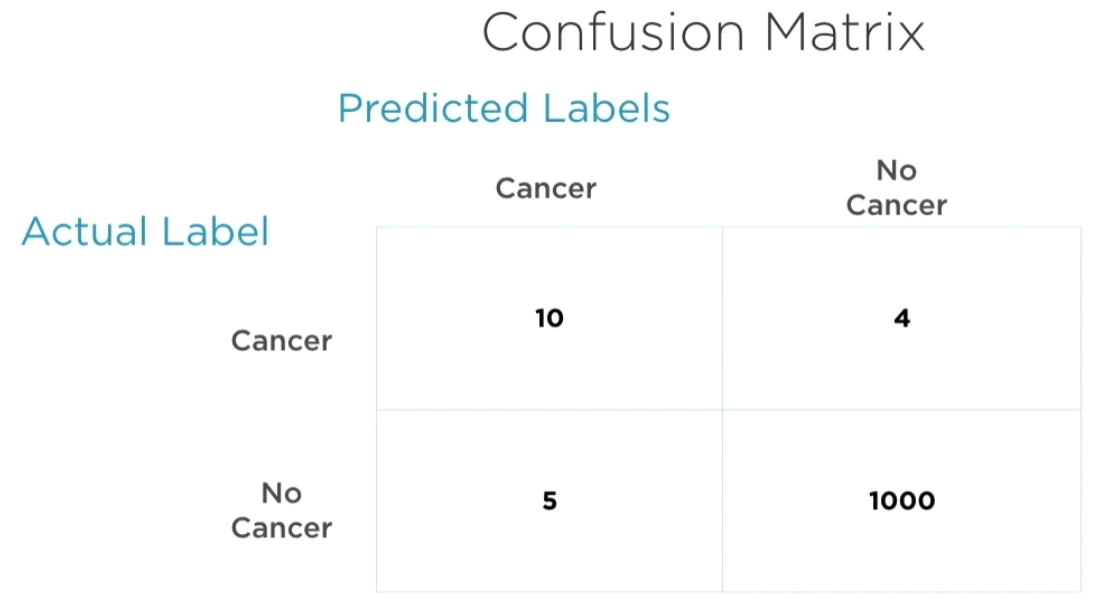

**True Positive** : Predicted value matches Actual value

**False Positive** : Predicted value does not matches Actual value

**True Negative** : Predicted value matches Actual value

**False Negative** : Predicted value does not matches Actual value

Which one do you think may say bad story about your model?

**Accuracy** (TP + TN) / (Num Instances) = 1010/1019 = 99.12%

**Preceision: Accuracy when classifier flags cancer** TP /(TP+FP) = 10/15 = 66.67% which means 1 in 3 cancer diagnoses is incorrect.

**Recall: Accuracy when cancer actually present** TP/(TP+FN)=10/(10+14) = 71.42% which means 2 in 7 cancer cases missed


#Applying Logistic Regression

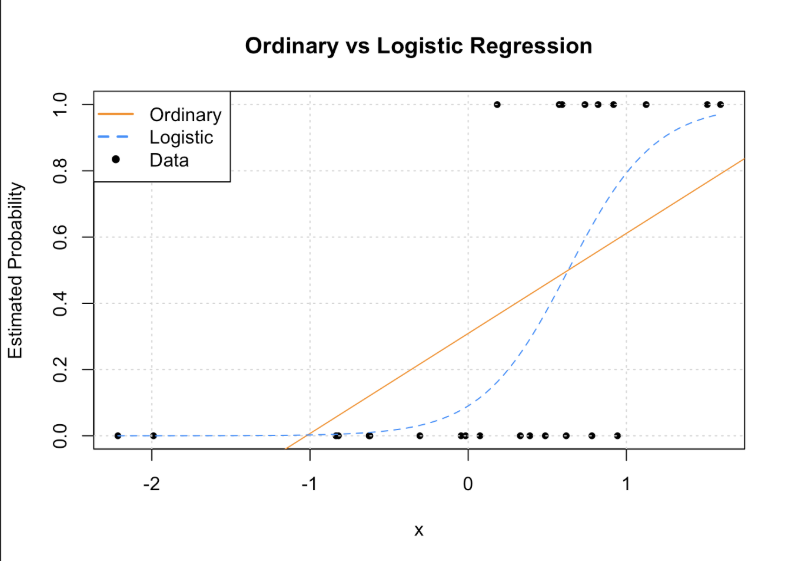

**Logistic Regression Threshold** You can determine your model threshold as you start experiencing the data.It could 50% or either less or more than 50%.

Assum that you pick P(threshold) = 0. How will the confusion matrix look like?


In [ ]:
                 #Predicted
#Actual       #Cancer      #No Cancer
#Cancer         14TP           0 FN
#No Cancer      1005FP         0 TN

#Accuracy = (tp+tn)/all = (14+0)/1019 = <=2%
#Precicsion = tp/(tp+fp) = 14/1005 = <=2%
#Recall = tp/(tp+fn) = 14/14 = 100%
# Note: We are dealing with not conservative classifier --> This model predicted everyone is not healthy

Let's pick P(threshold) = 1. How will the confusion matrix look like?

In [ ]:
                 #Predicted
#Actual       #Cancer      #No Cancer
#Cancer         0TP           14 FN
#No Cancer      0FP           1005TN

#Accuracy = (tp+tn)/all = (0+1005)/1019 = 98.62%
#Precicsion = tp/(tp+fp) = 0/0 = infinite
#Recall = tp/(tp+fn) = 0/14 = 0%
# Note: We are dealing with very conservative classifier --> This model predicted everyone is not sick

Precision - Recall Tradeoff
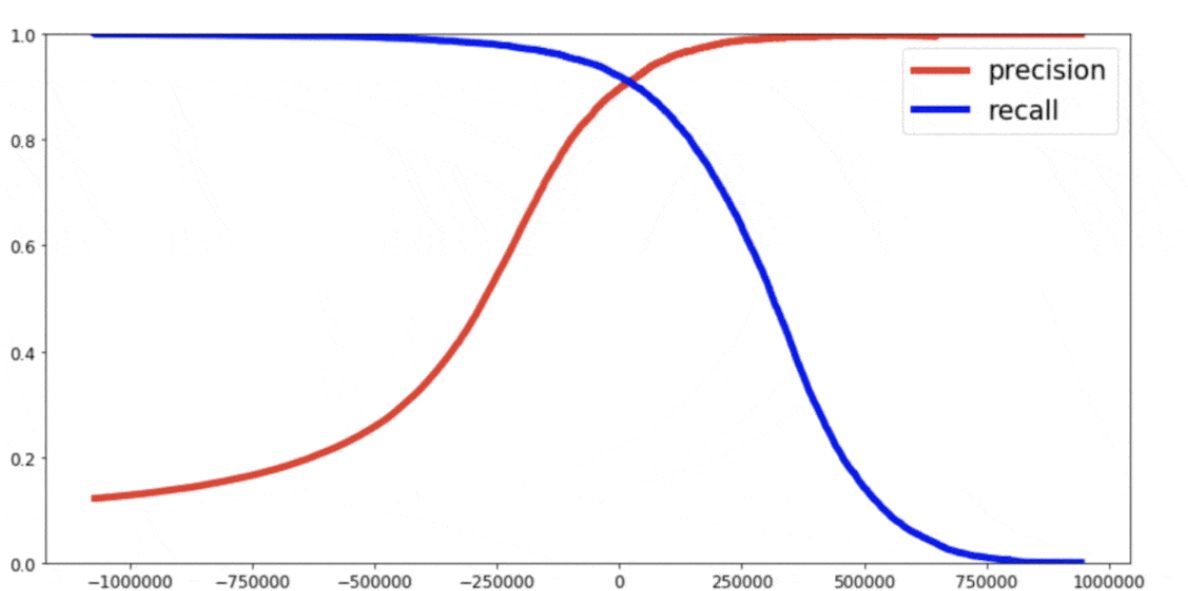

In [ ]:
#You have to balance between Recall and Precision. If you try to increase precision recall will decrease and vise versa.

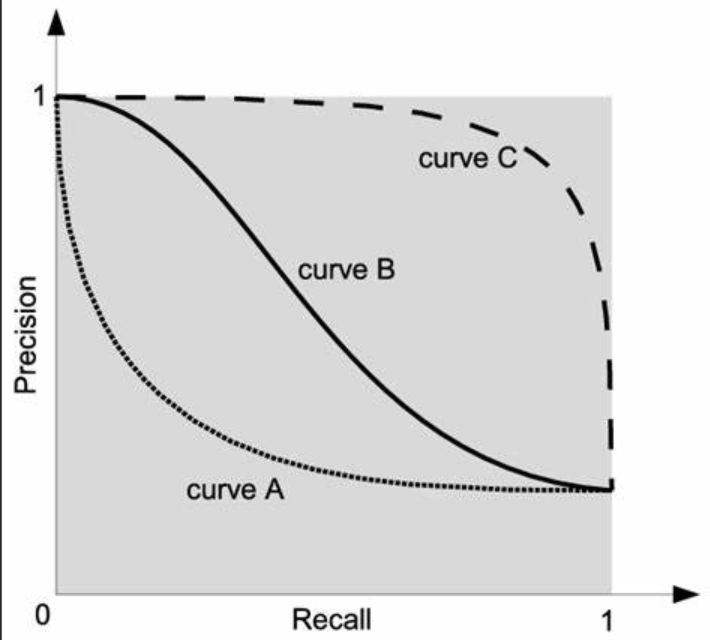

#So how do you choose Pthreshold?

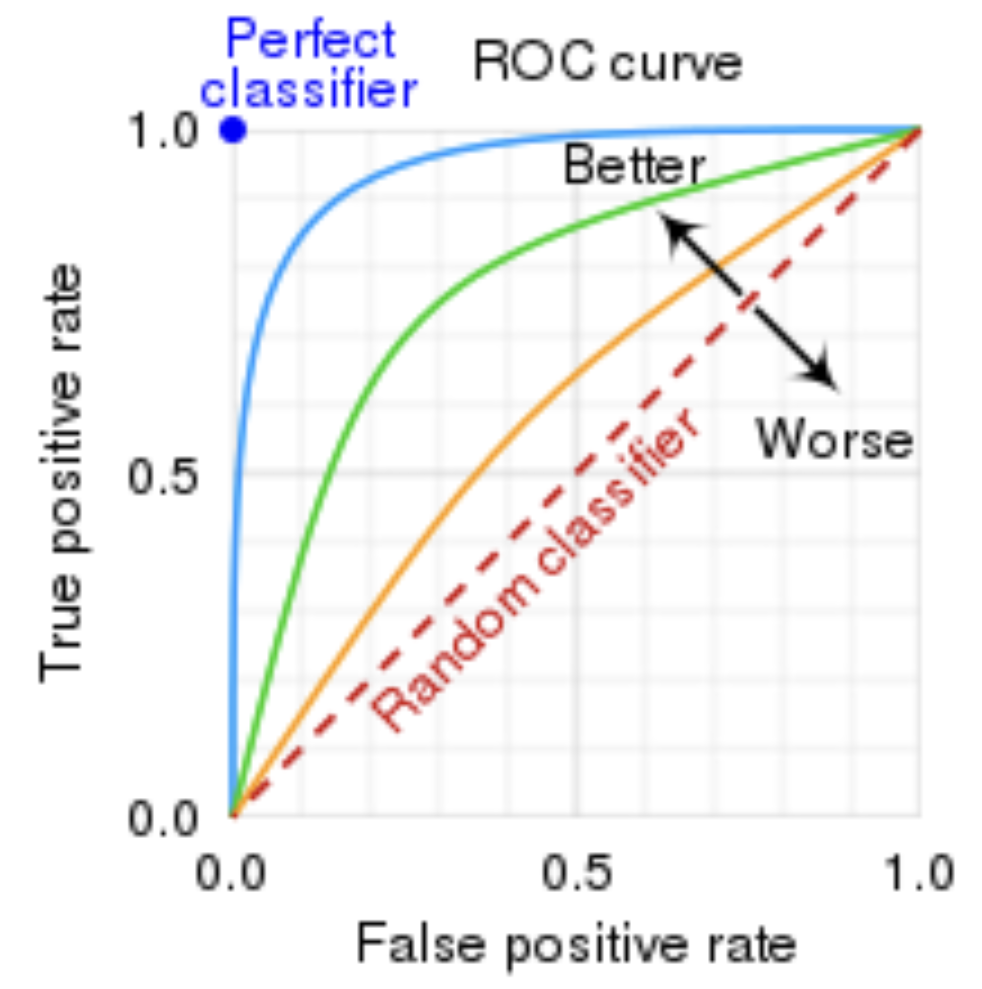

In [ ]:
#You wanted to minimize FP and maximize TP.
#ROC Curve --> Receiver Operating Characteristic
#Different values of Pthreshold (Hyperparameter tuning)

#Type of Classification Tasks

1. Binary Classification:
This involves classifying data into one of two mutually exclusive categories (e.g., yes/no, spam/not spam).
2. Multi-Class Classification:
This involves classifying data into one of several mutually exclusive categories (e.g., classifying images into different animal species).
3. Multi-Label Classification:
This involves classifying data into multiple, potentially non-exclusive categories (e.g., tagging a movie as both an action and comedy).
4. Imbalanced Classification:
This involves situations where the number of data points in each class is significantly different (e.g., detecting rare diseases).

#Let's do some practice

In [ ]:
#libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# check sklearn version
sklearn.__version__

In [ ]:
#Get the training data
path="https://raw.githubusercontent.com/DAPLearning2025/materials/refs/heads/main/Resources%20%26%20Data/Titanic/train.csv"
df=pd.read_csv(path)
df.head()

#Some notes about data
#Embarked:
#S - Southampton
#C - Cherbourg
#Q - Queenstown

In [ ]:
#df.info()
#df.shape
# df.describe()
df.dtypes

In [ ]:
#which columns that add no context here
df.columns

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.head(10)

In [ ]:
#check missing fields
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
#Statistical method to fill out the missing values
# df['Age'].fillna(df['Age'].mean(),inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
#check missing values again
df.isnull().sum()

In [ ]:
# we could have just dropped all the null values but I don't prefer this way.
# df.dropna(inplace=True)
# df.isnull().sum()

In [ ]:
#Check the shape again
df.shape
# Statistical look
df.describe()

In [ ]:
# how different features affect the survive
# Plotting a scatter plot to check the relationship between age and survived
sns.scatterplot(x='Age',y='Survived',data=df);

In [ ]:
#Another way
fig, ax = plt.subplots(figsize=(7, 7))

plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title('Scatter Plot of Age vs. Survived')
plt.show()


In [ ]:
#Let's use Fare this time
sns.scatterplot(x='Fare',y='Survived',data=df);

In [ ]:
#Notice some outliers
#Let's visual data using crosstab
pd.crosstab(df['Survived'],df['Sex'])

In [ ]:
pd.crosstab(df['Survived'],df['Pclass'])

In [ ]:
#Check relatioship amoung the fields
df_corr=df.corr(numeric_only=True)
df_corr

In [ ]:
#Get visual corr == heatmap
fig,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_corr,annot=True);

In [ ]:
df.dtypes

In [ ]:
#quantify the data: ML works only with numeric data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
# df['Embarked']=le.fit_transform(df['Embarked'])
df.head()

In [ ]:
df['Sex'].value_counts()


In [ ]:
#check back the value before encofing
le.classes_

In [ ]:
#Categorical values with no intrinsic order can be converted to numeric values using one-hot encoding
df=pd.get_dummies(df,columns=['Embarked'])
df.head()

In [ ]:
titanic_df=df.sample(frac=1).reset_index(drop=True) #Perfoming a shuffle
titanic_df.head()


In [ ]:
titanic_df.to_csv('titanic_df.csv',index=False)

#Training a logistic regression classifier

In [ ]:
path="/content/titanic_df.csv"
df_process=pd.read_csv(path)
df_process.head()

In [ ]:
df_process.shape

In [ ]:
from sklearn.model_selection import train_test_split

X=df_process.drop('Survived',axis=1)
y=df_process['Survived']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#check training
X_train.shape,y_train.shape

In [ ]:
X_test.shape,y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_model=LogisticRegression(penalty='l2', C=1.0, solver='liblinear') #l1
lg_model.fit(X_train,y_train)

In [ ]:
#Why using penalty:
# ==> Regularize the model by applying a penalty on overly complex models
#What's C?
# ==> Inverse of regularization strength - smaller values indicates stronger
#What's solver?
# ==> Algorithm to use in the optimization problem the liblinear solver works well on small datasets


In [ ]:
#Let's test the model
y_pred=lg_model.predict(X_test)

In [ ]:
prediction_results=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
prediction_results.head()

In [ ]:
prediction_results.tail()

In [ ]:
#Objective way to mearuer the performance of our model
titanic_crossTab = pd.crosstab(prediction_results['y_test'],prediction_results['y_pred'])
titanic_crossTab

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score


In [ ]:
df_acc = accuracy_score(y_test,y_pred)
df_prec = precision_score(y_test,y_pred)
df_recall = recall_score(y_test,y_pred)
df_f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {df_acc:.4f}") #% of right prediction
print(f"Precision: {df_prec:.4f}") # % of predicted survived that really survived
print(f"Recall: {df_recall:.4f}") # % of actual survivors that the model correctly predicted

In [ ]:
TP=titanic_crossTab[1][1]
TN=titanic_crossTab[0][0]
FP=titanic_crossTab[0][1]
FN=titanic_crossTab[1][0]

print(f"TP: {TP}")
print(f"TN: {TN}")
print(f"FP: {FP}")
print(f"FN: {FN}")

In [ ]:
#Manual cal
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#implement different classification models using appropriate helper functions

In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



In [ ]:
new_df=pd.read_csv(path)
new_df.head(10)

In [ ]:
FEATURES = list(new_df.columns[1:])
FEATURES

In [ ]:
# We wanted to create a dictionnary where we can save our result
result_dict = {}

In [ ]:
def summarize_classification(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred,normalize=True)
  num_acc = accuracy_score(y_test,y_pred,normalize=False)

  prec = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  return {
      "accuracy":acc,
      "precision":prec,
      "recall":recall,
      "accuracy_count":num_acc
  }


In [ ]:
def build_model(classifier_fn,
                name_of_y_col,
                names_of_x_cols,
                dataset,
                test_frac=0.2):

  X = dataset[names_of_x_cols]
  y = dataset[name_of_y_col]

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_frac)

  model = classifier_fn(X_train,y_train)

  y_pred = model.predict(X_test)

  y_pred_train = model.predict(X_train)

  train_summary = summarize_classification(y_train,y_pred_train)
  test_summary = summarize_classification(y_test,y_pred)


  pred_results = pd.DataFrame({'y_test':y_test,
                               'y_pred':y_pred})

  model_crosstab = pd.crosstab(pred_results.y_pred,pred_results.y_test)

  return {
      "training":train_summary,
      "test":test_summary,
      "confusion_matrix":model_crosstab
  }


In [ ]:
def compare_results():
  for key in result_dict:
    print("Classification: ",key)

    print()
    print("Training data")
    for score in result_dict[key]["training"]:
      print(score,result_dict[key]["training"][score])

    print()
    print("Test data")
    for score in result_dict[key]["test"]:
      print(score,result_dict[key]["test"][score])

    print()


In [ ]:
def logistic_fn(X_train,y_train):
  model = LogisticRegression(solver='liblinear')
  model.fit(X_train,y_train)
  return model

In [ ]:
result_dict["survived_logistic"] = build_model(logistic_fn,
                                                 "Survived",
                                                 FEATURES,
                                                 new_df)
compare_results()